In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('NC_policing.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402087 entries, 0 to 402086
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   state               402087 non-null  object 
 1   stop_date           402087 non-null  object 
 2   driver_gender       402087 non-null  object 
 3   driver_age          401996 non-null  float64
 4   driver_race_raw     402087 non-null  object 
 5   driver_race         402087 non-null  object 
 6   violation           402087 non-null  object 
 7   search_type         402087 non-null  object 
 8   contraband_found    402087 non-null  bool   
 9   stop_outcome        402087 non-null  object 
 10  search_basis        402087 non-null  object 
 11  officer_id          402087 non-null  int64  
 12  drugs_related_stop  4379 non-null    object 
 13  district            402049 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(11)
memory usage: 40.3+ MB


In [3]:
#Looking at the features/attributes, checking for missing and NaN values.
print("\033[1mData types:\033[0m\n", data.dtypes, "\n\n\033[1mNull values:\033[0m\n", pd.DataFrame.isnull(data).sum())
print(pd.DataFrame.head(data))
data = data[data['driver_age'].notna()]

#Converting drugs_related_stop NaN into False
data['drugs_related_stop'].fillna(False, inplace=True)

Data types:
 state                  object
stop_date              object
driver_gender          object
driver_age            float64
driver_race_raw        object
driver_race            object
violation              object
search_type            object
contraband_found         bool
stop_outcome           object
search_basis           object
officer_id              int64
drugs_related_stop     object
district               object
dtype: object 

Null values:
 state                      0
stop_date                  0
driver_gender              0
driver_age                91
driver_race_raw            0
driver_race                0
violation                  0
search_type                0
contraband_found           0
stop_outcome               0
search_basis               0
officer_id                 0
drugs_related_stop    397708
district                  38
dtype: int64
  state   stop_date driver_gender  driver_age driver_race_raw driver_race  \
0    NC  2000-07-31             M        

In [4]:
#Step 04: Inspecting unique values to be encoded.
#Define a function to print the unique values in columns
def print_unique(data, col_names):
    for col in col_names:
        print(f"\033[4m{col}\033[0m", ': ', data[col].unique())

#Limit to columns with exhaustive (or truncated) unique values
columns = list(data.columns.values.tolist())
columns.remove('search_basis')
print(f"\033[1mColumns of the dataset:\n\033[0m{columns} \n")
print('\033[1mUnique values in each column:\033[0m')
print_unique(data, columns)

#Check if driver_race_raw communicates anything specific about the sample
print("\n\033[1mRelationship b/w race and race_raw:\033[0m\n",data.groupby(["driver_race", "driver_race_raw"]).size())

Columns of the dataset:
['state', 'stop_date', 'driver_gender', 'driver_age', 'driver_race_raw', 'driver_race', 'violation', 'search_type', 'contraband_found', 'stop_outcome', 'officer_id', 'drugs_related_stop', 'district'] 

Unique values in each column:
state :  ['NC']
stop_date :  ['2000-07-31' '2000-08-01' '2000-08-02' ... '2015-12-29' '2015-12-30'
 '2015-12-31']
driver_gender :  ['M' 'F']
driver_age :  [23. 29. 49. 24. 21. 33. 16. 28. 39. 68. 20. 40. 50. 57. 38. 46. 34. 44.
 22. 36. 53. 32. 15. 27. 26. 41. 48. 25. 47. 42. 52. 17. 76. 61. 31. 30.
 64. 37. 19. 51. 18. 35. 59. 73. 43. 45. 66. 65. 54. 58. 55. 75. 63. 56.
 60. 81. 62. 77. 67. 69. 87. 70. 71. 78. 74. 85. 72. 79. 93. 80. 89. 82.
 84. 91. 83. 90. 88. 86. 92. 98. 99. 94. 96.]
driver_race_raw :  ['W N' 'B N' 'U H' 'W H' 'I N' 'U N' 'A N' 'A H' 'B H' 'I H']
driver_race :  ['White' 'Black' 'Hispanic' 'Other' 'Asian']
violation :  ['Speeding' 'DUI' 'Equipment' 'Seat belt' 'Other' 'Registration/plates'
 'Safe movement' 'Stop si

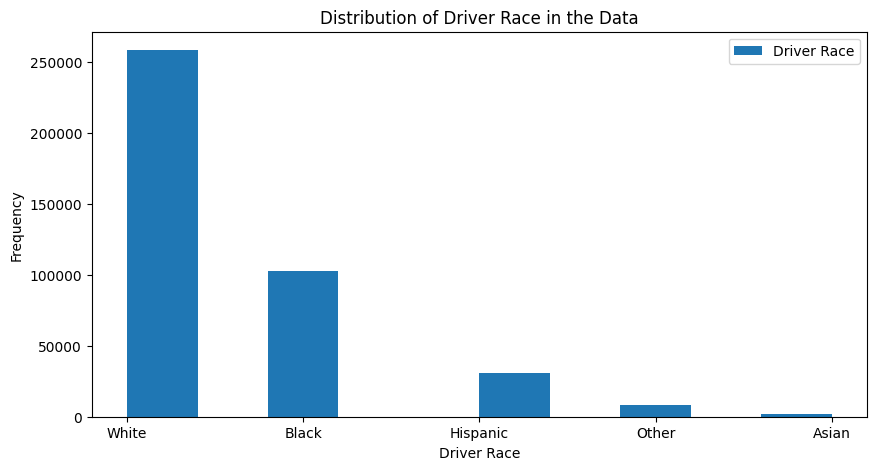

In [5]:
#Distribution of Driver Race in the Data
plt.figure(figsize=(10,5))
plt.hist(data['driver_race'], label='Driver Race')
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Driver Race')
plt.title("Distribution of Driver Race in the Data")
plt.show()

In [6]:
#Step 04: Encoding categorical attributes.
#Using LabelEncoder() for binary variables
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data_encoded = data.copy()
data_encoded.loc[:, ('contraband_found')] = encoder.fit_transform(data_encoded.loc[:, ('contraband_found')])
data_encoded.loc[:, ('driver_gender')] = encoder.fit_transform(data_encoded.loc[:, ('driver_gender')])
data_encoded.loc[:, ('drugs_related_stop')] = encoder.fit_transform(data_encoded.loc[:, ('drugs_related_stop')])

#Dictionary encoding where different order is needed
data_encoded.loc[:, ('stop_outcome')] = data_encoded.replace( {"Arrest": 1, "No Action": 0} )

#One-hot encoding for categorical dummy variables
one_hot = pd.get_dummies(data_encoded.loc[:, ('driver_race')], prefix='race')
data_encoded = data_encoded.drop('driver_race',axis = 1)
data_encoded = data_encoded.join(one_hot)
data_encoded = data_encoded.drop(['driver_race_raw','district','officer_id', 'state', 'stop_date'], axis = 1)

data_encoded.head()

/var/folders/8y/gcrnzpp17kj_68w30t1fyf1r0000gn/T/ipykernel_1577/2591682050.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_encoded.loc[:, ('driver_gender')] = encoder.fit_transform(data_encoded.loc[:, ('driver_gender')])
/var/folders/8y/gcrnzpp17kj_68w30t1fyf1r0000gn/T/ipykernel_1577/2591682050.py:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_encoded.loc[:, ('stop_outcome')] = data_encoded.replace( {"Arrest": 1, "No Action": 0} )


,driver_gender,driver_age,violation,search_type,contraband_found,stop_outcome,search_basis,drugs_related_stop,race_Asian,race_Black,race_Hispanic,race_Other,race_White
0,1,23.0,Speeding,No Search Conducted,0,1,No Search Conducted,0,0,0,0,0,1
1,0,29.0,Speeding,No Search Conducted,0,1,No Search Conducted,0,0,0,0,0,1
2,0,49.0,Speeding,No Search Conducted,0,1,No Search Conducted,0,0,1,0,0,0
3,1,29.0,Speeding,No Search Conducted,0,1,No Search Conducted,0,0,1,0,0,0
4,1,24.0,Speeding,No Search Conducted,0,1,No Search Conducted,0,0,0,1,0,0


In [7]:
data_encoded['search_basis'].unique()

array(['No Search Conducted', 'Observation Suspected Contraband',
       'Erratic Suspicious Behaviour', 'Other Official Info',
       'Suspicious Movement', 'Witness Observation', 'Informant Tip',
       'Observation Suspected Contraband,Other Official Info',
       'Erratic Suspicious Behaviour,Witness Observation',
       'Erratic Suspicious Behaviour,Observation Suspected Contraband',
       'Erratic Suspicious Behaviour,Other Official Info',
       'Other Official Info,Witness Observation',
       'Observation Suspected Contraband,Witness Observation',
       'Erratic Suspicious Behaviour,Observation Suspected Contraband,Other Official Info',
       'Erratic Suspicious Behaviour,Observation Suspected Contraband,Other Official Info,Suspicious Movement',
       'Observation Suspected Contraband,Informant Tip',
       'Observation Suspected Contraband,Other Official Info,Suspicious Movement,Informant Tip,Witness Observation',
       'Erratic Suspicious Behaviour,Other Official Info,I

In [8]:
#Encoding violation based on specific keywords
data_encoded['speeding_violation'] = np.where(data_encoded['violation'].str.find('Speed') != -1, 1, 0)
data_encoded['dui_violation'] = np.where(data_encoded['violation'].str.find('DUI') != -1, 1, 0)
data_encoded['equipment_violation'] = np.where(data_encoded['violation'].str.find('Equip') != -1, 1, 0)
data_encoded['seatbelt_violation'] = np.where(data_encoded['violation'].str.find('Seat') != -1, 1, 0)
data_encoded['other_violation'] = np.where(data_encoded['violation'].str.find('Other') != -1, 1, 0)
data_encoded['registration_violation'] = np.where(data_encoded['violation'].str.find('Registration') != -1, 1, 0)
data_encoded['unsafe_violation'] = np.where(data_encoded['violation'].str.find('Safe') != -1, 1, 0)
data_encoded['stop_violation'] = np.where(data_encoded['violation'].str.find('Stop') != -1, 1, 0)

#Encoding search_type based on specific keywords
data_encoded['no_search'] = np.where(data_encoded['search_type'].str.find('Search') != -1, 1, 0)
data_encoded['protective_frisk'] = np.where(data_encoded['search_type'].str.find('Protective') != -1, 1, 0)
data_encoded['incident'] = np.where(data_encoded['search_type'].str.find('Incident') != -1, 1, 0)
data_encoded['consensual_search'] = np.where(data_encoded['search_type'].str.find('Consent') != -1, 1, 0)
data_encoded['probable_cause'] = np.where(data_encoded['search_type'].str.find('Probable') != -1, 1, 0)
data_encoded['warrant'] = np.where(data_encoded['search_type'].str.find('Warrant') != -1, 1, 0)

#Encoding search_basis based on specific keywords
data_encoded['erratic_behavior'] = np.where(data_encoded['search_basis'].str.find('Erratic') != -1, 1, 0)
data_encoded['informant_tip'] = np.where(data_encoded['search_basis'].str.find('Informant') != -1, 1, 0)
data_encoded['contraband_observed'] = np.where(data_encoded['search_basis'].str.find('Contraband') != -1, 1, 0)
data_encoded['suspicious_movement'] = np.where(data_encoded['search_basis'].str.find('Movement') != -1, 1, 0)
data_encoded['witness_observation'] = np.where(data_encoded['search_basis'].str.find('Witness') != -1, 1, 0)
data_encoded['other_info'] = np.where(data_encoded['search_basis'].str.find('Official') != -1, 1, 0)

data_encoded.head()

,driver_gender,driver_age,violation,search_type,contraband_found,stop_outcome,search_basis,drugs_related_stop,race_Asian,race_Black,...,incident,consensual_search,probable_cause,warrant,erratic_behavior,informant_tip,contraband_observed,suspicious_movement,witness_observation,other_info
0,1,23.0,Speeding,No Search Conducted,0,1,No Search Conducted,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,29.0,Speeding,No Search Conducted,0,1,No Search Conducted,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,49.0,Speeding,No Search Conducted,0,1,No Search Conducted,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,29.0,Speeding,No Search Conducted,0,1,No Search Conducted,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,24.0,Speeding,No Search Conducted,0,1,No Search Conducted,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#Descriptive Statistics: Shares of observations per race and other attributes.
data_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
driver_gender,401996.0,0.905325,0.292766,0.0,1.0,1.0,1.0,1.0
driver_age,401996.0,41.878103,13.019045,15.0,32.0,42.0,52.0,99.0
contraband_found,401996.0,0.016662,0.128001,0.0,0.0,0.0,0.0,1.0
stop_outcome,401996.0,0.307899,0.461625,0.0,0.0,0.0,1.0,1.0
drugs_related_stop,401996.0,0.010888,0.103777,0.0,0.0,0.0,0.0,1.0
race_Asian,401996.0,0.004415,0.066302,0.0,0.0,0.0,0.0,1.0
race_Black,401996.0,0.255965,0.436403,0.0,0.0,0.0,1.0,1.0
race_Hispanic,401996.0,0.076371,0.265592,0.0,0.0,0.0,0.0,1.0
race_Other,401996.0,0.020271,0.140927,0.0,0.0,0.0,0.0,1.0
race_White,401996.0,0.642977,0.479122,0.0,0.0,1.0,1.0,1.0


/var/folders/8y/gcrnzpp17kj_68w30t1fyf1r0000gn/T/ipykernel_1577/2755323936.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = round(data_encoded.corr(),2)


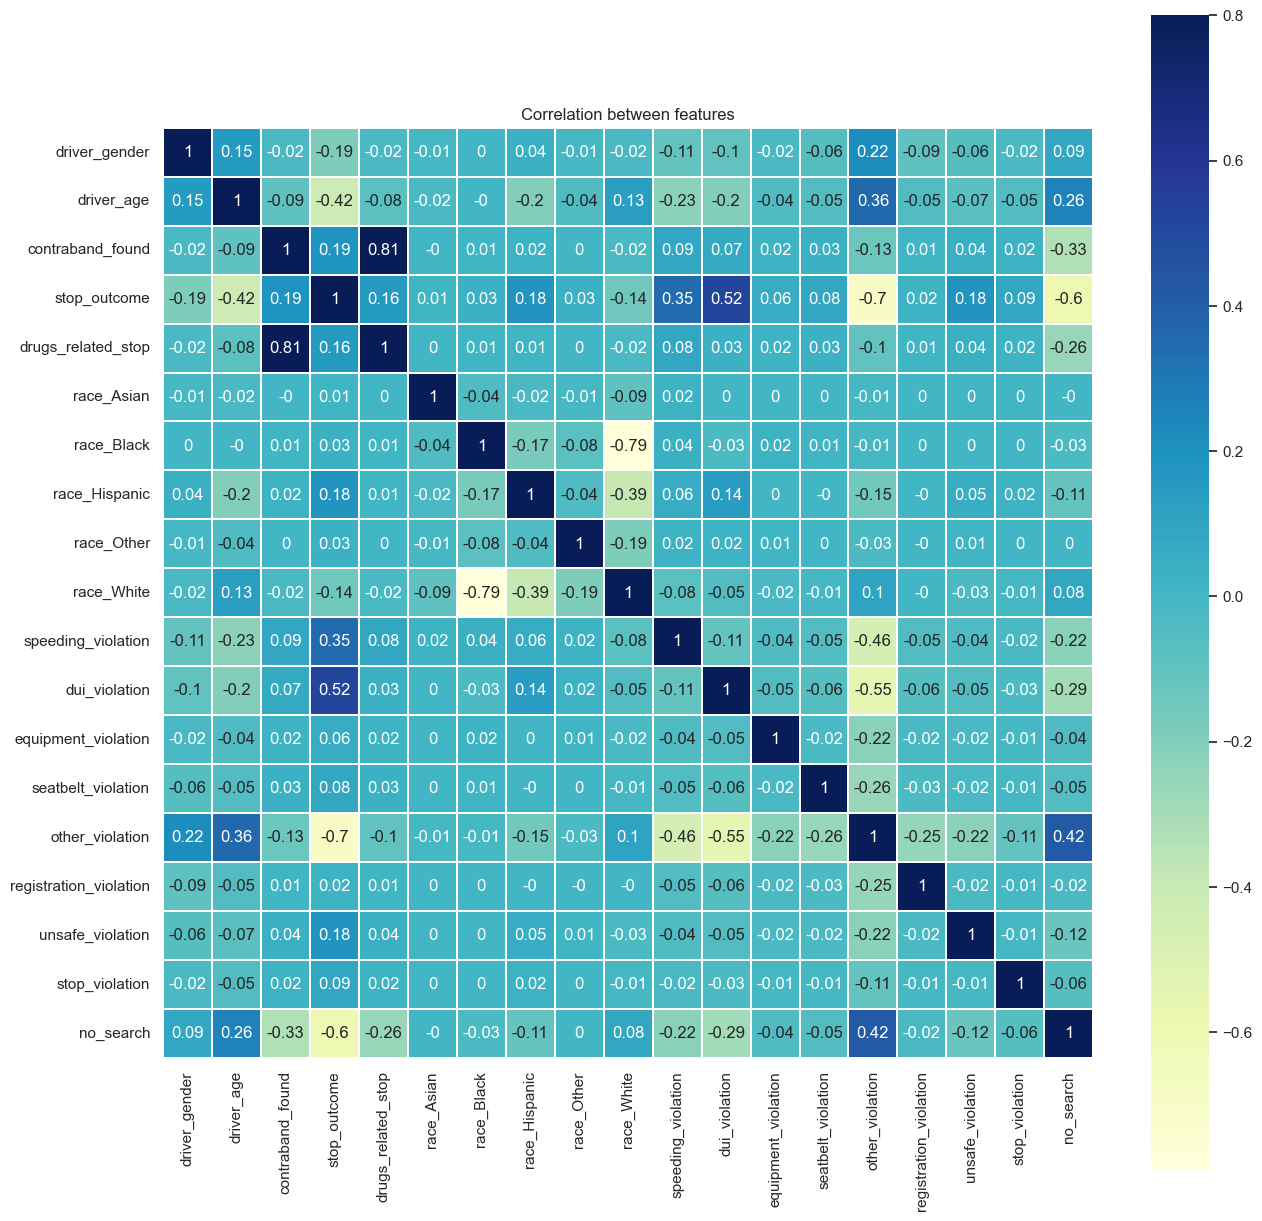

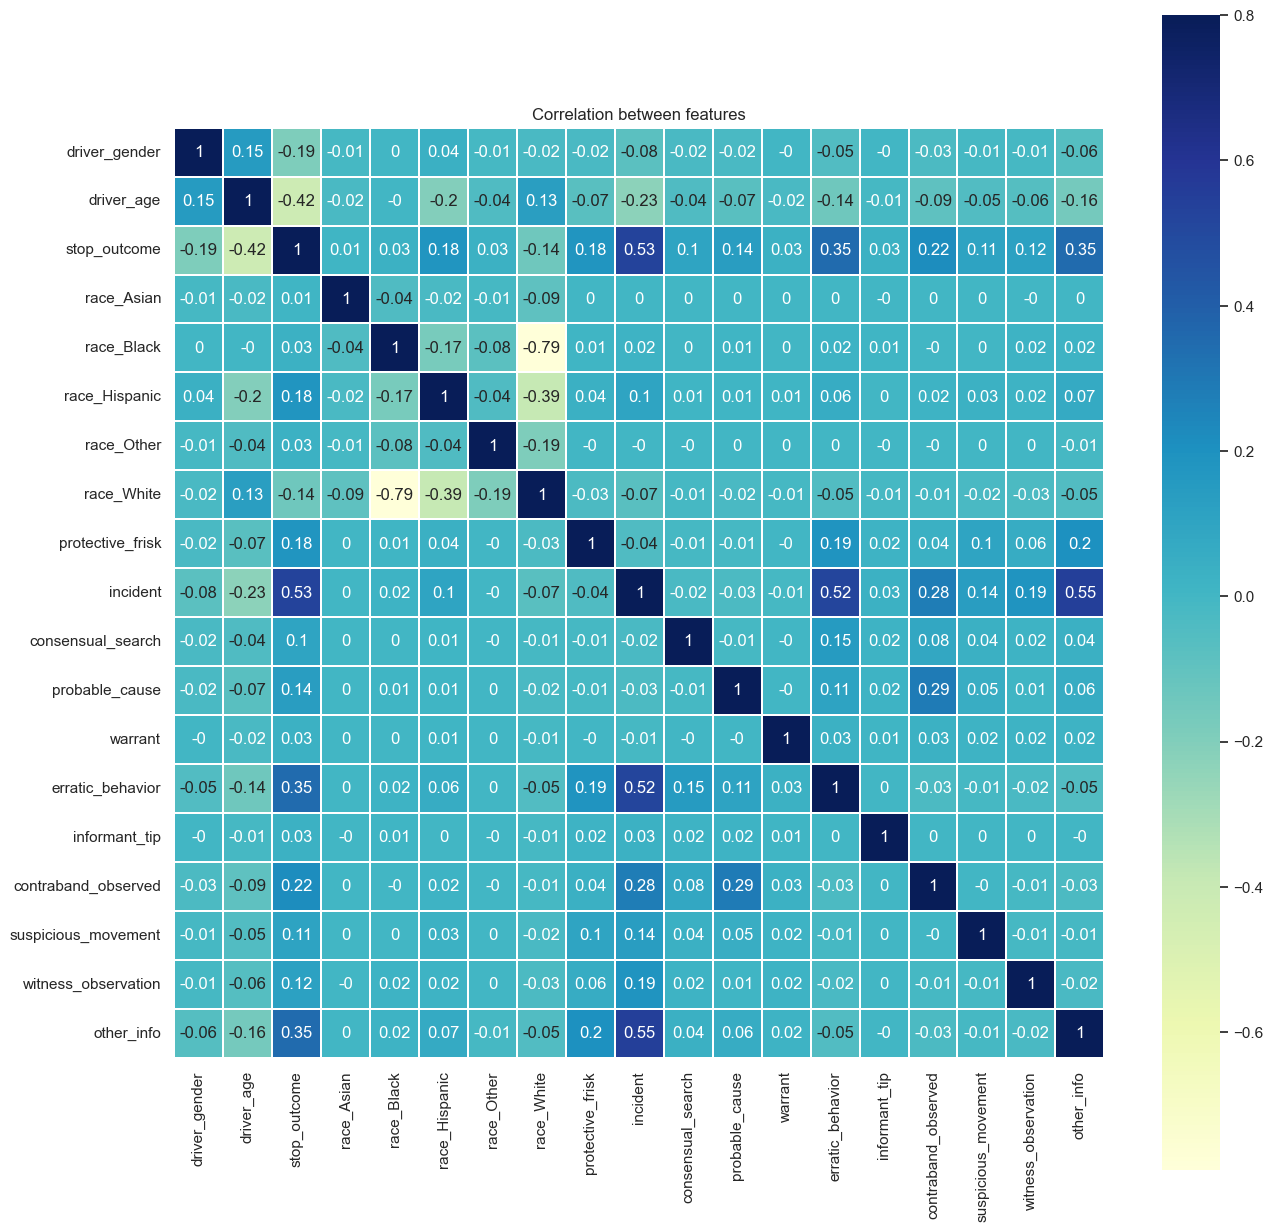

In [11]:
#Step 05: Ploting a Correlation Matrix.
#Using the heatmap from the seaborn package

corr = round(data_encoded.corr(),2)
corr_1 = corr.iloc[0:19,0:19]
corr_2 = corr.iloc[[0,1,3,5,6,7,8,9,19,20,21,22,23,24,25,26,27,28,29],
                  [0,1,3,5,6,7,8,9,19,20,21,22,23,24,25,26,27,28,29]]

#Correlations between sensitive attributes, stop_outcome, violations and contraband
plt.figure(figsize=(15, 15))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.heatmap(corr_1, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

#Correlations between sensitive attributes, stop_outcome, search_basis and search_type
plt.figure(figsize=(15, 15))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.heatmap(corr_2, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

Task 2: Clasification Models.
The task is to classify if a person will be arrested (stop_outcome). Generate two binary classifiers using two different methods of your liking and compare their performances against a dummy classifier which always predicts not arrested.

k-NN Classifier


In [12]:
#Separating predictors and the outcome into respective X and y matrices
X = data_encoded[['driver_age','race_White','erratic_behavior','contraband_observed','race_Hispanic','contraband_found','driver_gender','speeding_violation',
                  'dui_violation', 'other_violation', 'unsafe_violation', 'no_search', 'protective_frisk', 'incident', 'probable_cause']]
y = data_encoded['stop_outcome']
print(X,y)

#Splitting the matrices into training, validation and test set
from sklearn.model_selection import train_test_split
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
X_train, X_valid, y_train, y_valid = train_test_split(X_cv, y_cv, test_size=0.3, stratify=y_cv, random_state=7)


        driver_age  race_White  erratic_behavior  contraband_observed  \
0             23.0           1                 0                    0   
1             29.0           1                 0                    0   
2             49.0           0                 0                    0   
3             29.0           0                 0                    0   
4             24.0           0                 0                    0   
...            ...         ...               ...                  ...   
402082        18.0           1                 0                    1   
402083        21.0           0                 0                    0   
402084        29.0           1                 0                    1   
402085        18.0           1                 0                    1   
402086        31.0           0                 0                    0   

        race_Hispanic  contraband_found  driver_gender  speeding_violation  \
0                   0                 0      

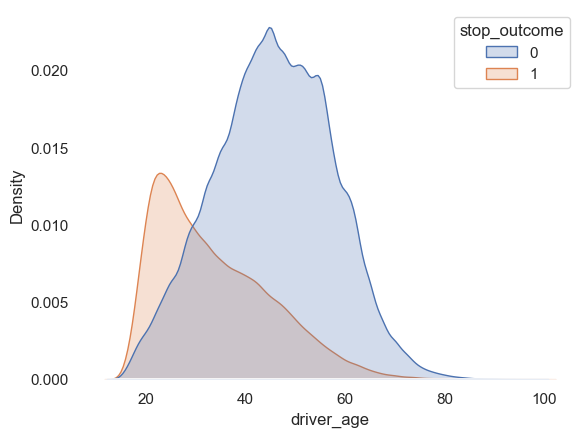

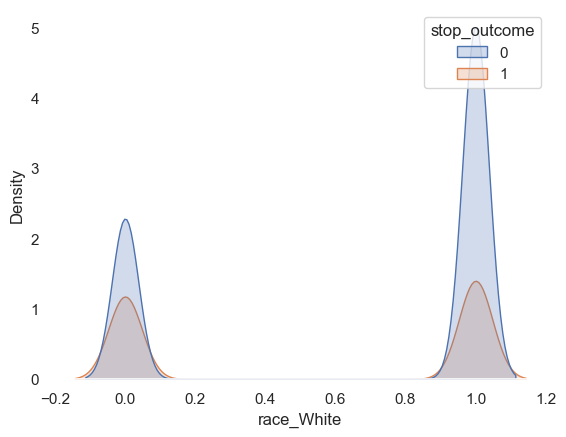

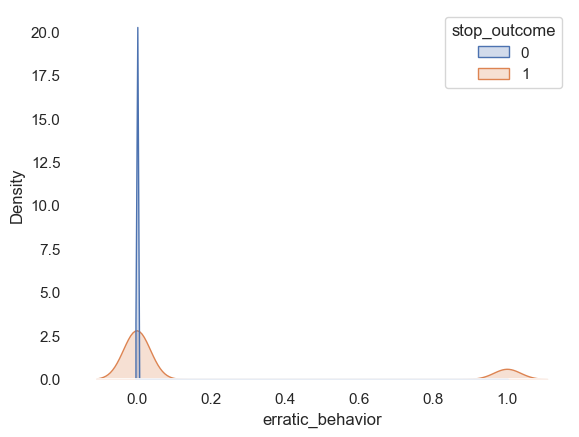

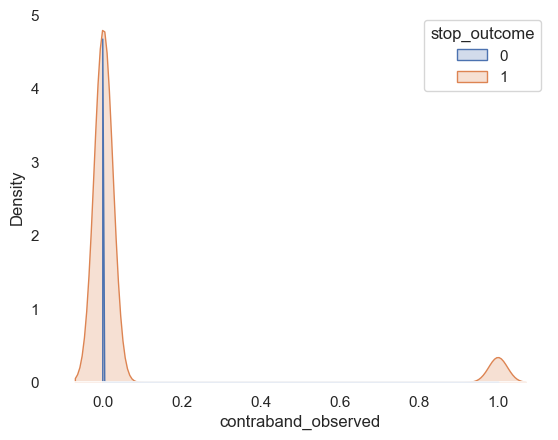

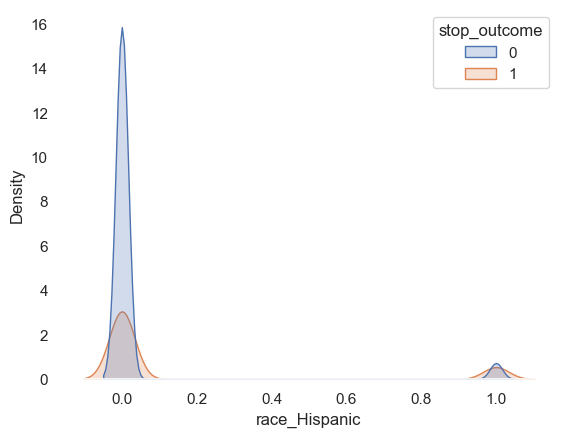

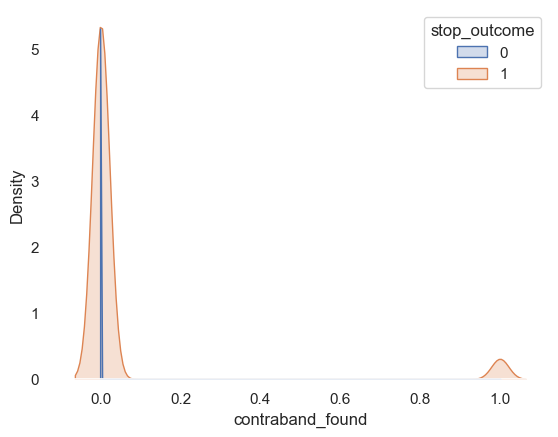

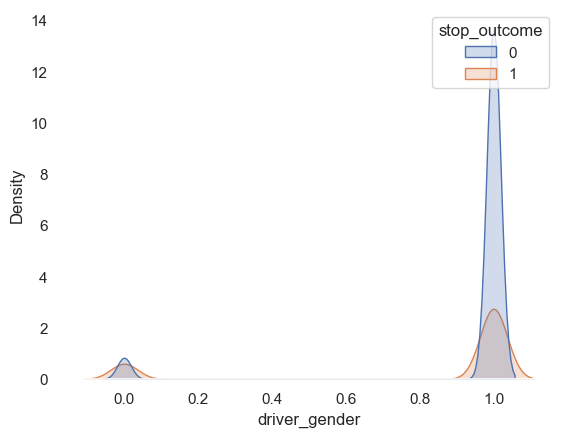

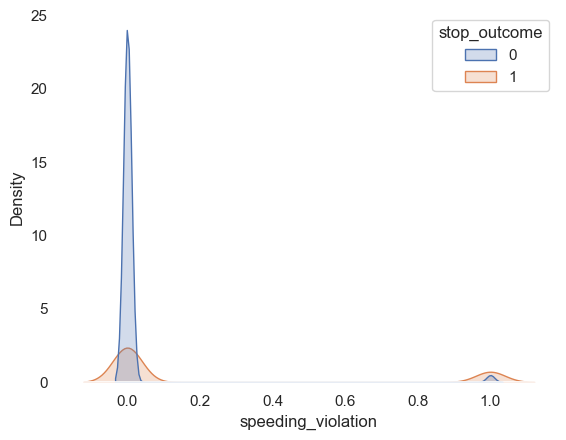

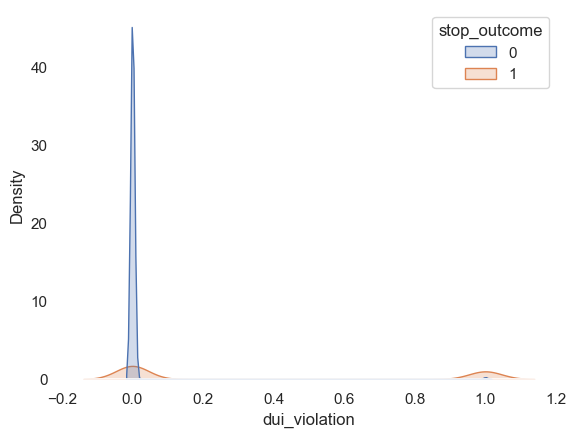

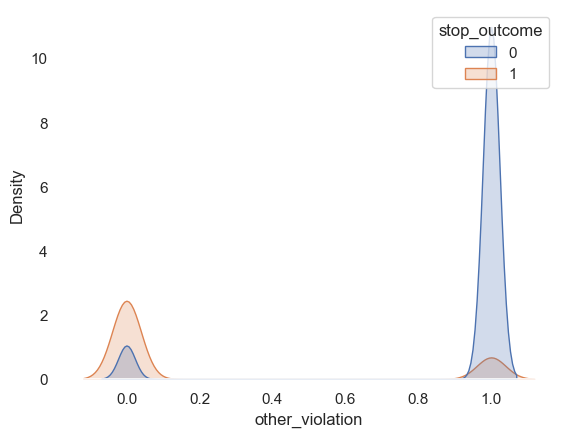

In [13]:
# Plot outputs appear and are stored within the notebook
%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns

for i, (column, color) in enumerate(zip(X.columns, sns.color_palette())):
    plt.figure(i)
    sns.kdeplot(x=column, fill=True, hue=y, data=X, color=color)

In [14]:
from sklearn.preprocessing import StandardScaler
# Creating a scaler object (here with default settings)
scaler = StandardScaler()
# Replacing the values in our training, validation and test X's by the normalized ones
X_train.values[:] = scaler.fit_transform(X_train)
X_valid.values[:] = scaler.transform(X_valid)
X_test.values[:] = scaler.transform(X_test)

In [15]:
#Process of selecting the hyperparameter k for a k-NN classifier
#Warning: takes 15 minutes to process; de-comment run only if you want to confirm
#Credit for the idea goes to an unknown classmate who shared his process in class
'''from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
score_knn = []
k_range = range(1,51)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_age_white, y_train_age_white)
    y_pred_age_white = knn.predict(X_valid_age_white)
    score_knn.append(accuracy_score(y_valid_age_white, y_pred_age_white))

plt.plot(k_range, score_knn)
plt.xlabel('k value')
plt.ylabel('Accuracy score')
plt.show() '''

"from sklearn.metrics import accuracy_score\nfrom sklearn.neighbors import KNeighborsClassifier\nscore_knn = []\nk_range = range(1,51)\nfor k in k_range:\n    knn = KNeighborsClassifier(n_neighbors=k)\n    knn.fit(X_train_age_white, y_train_age_white)\n    y_pred_age_white = knn.predict(X_valid_age_white)\n    score_knn.append(accuracy_score(y_valid_age_white, y_pred_age_white))\n\nplt.plot(k_range, score_knn)\nplt.xlabel('k value')\nplt.ylabel('Accuracy score')\nplt.show() "

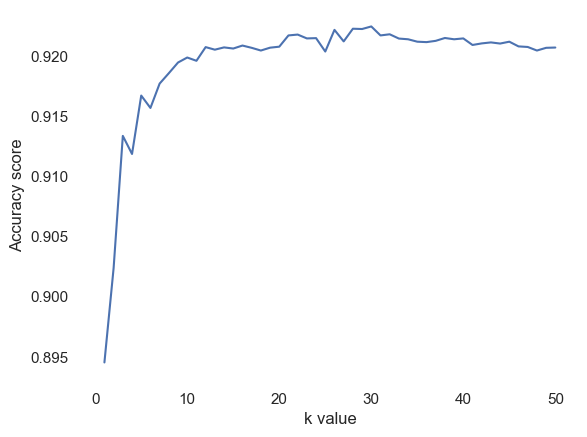

In [16]:
#We have saved the values from the for loop separately

k_range = range(1,51)

score_knn = [0.8945273631840795, 0.9023809523809524, 0.913361762615494, 0.9118573797678275, 0.9167140488036011, 0.9156834873252784, 0.9177090736792229, 
0.9185737976782753, 0.9194622127457949, 0.9198768064439706, 0.919604359156598, 0.920741530443023, 0.9205283108268183, 0.9207178393745558, 0.9206230751006871, 
0.9208718313195925, 0.920682302771855, 0.9204572376214167, 0.9206941483060886, 0.9207770670457237, 0.9217128642501777, 0.9217839374555793, 0.9214641080312722, 
0.9214877990997394, 0.9203743188817816, 0.9221748400852878, 0.9212153518123667, 0.9222696043591566, 0.9222459132906894, 0.9224591329068941, 0.9217128642501777, 
0.9218076285240464, 0.9214522624970386, 0.9213930348258706, 0.9211916607438996, 0.9211561241411987, 0.9212627339493011, 0.921499644633973, 0.9213930348258706, 
0.9214641080312722, 0.9209192134565269, 0.9210495143330965, 0.9211324330727316, 0.9210376687988628, 0.9211916607438996, 0.9208007581141909, 0.9207533759772566, 
0.9204572376214167, 0.920682302771855, 0.9207059938403221]

plt.plot(k_range, score_knn)
plt.xlabel('k value')
plt.ylabel('Accuracy score')
plt.show()

In [17]:
#Final version of the kNN model
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of KNN with n_neighbors=30 (k=30)
knn = KNeighborsClassifier(n_neighbors=30)
# Train the model on the training set with the encoded labels
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [22]:
from sklearn.metrics import plot_confusion_matrix

# Plot the confusion matrix for the test set for the KNN classifier
plt.figure()
plot_confusion_matrix(knn, X_test, y_test, display_labels=['No Action','Arrest'], values_format='d')
plt.grid(False)
plt.title('Test set confusion matrix of KNN')
plt.show()

NameError: name 'ConfusionMatrixDisplay' is not defined

<Figure size 640x480 with 0 Axes>

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

#True/false positives/negatives of the kNN
tn_knn, fp_knn, fn_knn, tp_knn = confusion_matrix(y_test, knn.predict(X_test)).ravel()
print('True Positive of KNN:\t', tp_knn)
print('True Negative of KNN:\t',tn_knn)
print('False Positive of KNN:\t', fp_knn)
print('False Negative of KNN:\t', fn_knn)

#Accuracy
accuracy_knn = metrics.accuracy_score(y_test, knn.predict(X_test))
print('The Accuracy:',round(accuracy_knn,2))

True Positive of KNN:	 30510
True Negative of KNN:	 80664
False Positive of KNN:	 2730
False Negative of KNN:	 6695


KeyboardInterrupt: 

In [ ]:
#Standard metrics of performance: recall and precision
recall_knn_manual = tp_knn/(tp_knn + fn_knn)
precision_knn_manual = tp_knn/(tp_knn + fp_knn)

print('Recall of KNN:\t\t',round(recall_knn_manual,2))
print('Precision of KNN:\t',round(precision_knn_manual,2))

#F1 metric of performance
f1_knn_manual = 2 * precision_knn_manual * recall_knn_manual / (precision_knn_manual + recall_knn_manual)

print('F1 of KNN:\t\t',round(f1_knn_manual,2))

In [ ]:
from sklearn.metrics import precision_recall_curve

precision_knn, recall_knn, thresholds = precision_recall_curve(y_test, knn.predict_proba(X_test)[:, 1])

print(thresholds)
#Plot the curve
plt.figure(figsize=[6,6])
plt.plot(recall_knn, precision_knn, label='KNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall-Curves')
plt.legend(loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

#Calculate the false positive and true positive rates for training and test set
fpr_train_knn, tpr_train_knn, thresholds = roc_curve(y_train, knn.predict_proba(X_train)[:, 1])
print('Train:',thresholds)
fpr_test_knn, tpr_test_knn, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
print('Test:',thresholds)
#Calculate the area under the curve
auc_train_knn = auc(fpr_train_knn, tpr_train_knn)
auc_test_knn = auc(fpr_test_knn, tpr_test_knn)

#Plot the ROC curve
plt.figure(figsize=[6,6])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_train_knn, tpr_train_knn, label='train (area = {:.3f})'.format(auc_train_knn))
plt.plot(fpr_test_knn, tpr_test_knn, label='test (area = {:.3f})'.format(auc_test_knn))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve of KNN')
plt.legend(loc='lower right')
plt.show()

Decision Tree classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#It is possible to let DecisionTreeClassifier pick the hyperparameters
#However, in that case we do not know if there is a marginally worse but smaller combination
dct = DecisionTreeClassifier(criterion = 'gini')
dct.fit(X_train, y_train)
y_pred = dct.predict(X_valid)
print("Default score:\t", round(accuracy_score(y_valid, y_pred),4))

Default score:	 0.9252


In [25]:
#Process of selecting the three hyperparameters in the DcT classifier
#Note: Process is much faster for DcT than for kNN
'''
score_dct = []

for md in range(1,11):
    for mss in range(2,12):
        for mln in range(2,12):
            dct = DecisionTreeClassifier(max_depth = md, min_samples_split = mss, max_leaf_nodes = mln, criterion = 'gini')
            dct.fit(X_train, y_train)
            y_pred = dct.predict(X_valid)
            score_dct.append(accuracy_score(y_valid, y_pred))

best_lowest_score = []

for md in range(1,11):
    for mss in range(2,12):
        for mln in range(2,12):
            best_lowest_score.append(str(md)+"-"+str(mss)+"-"+str(mln))
            
print("Best lowest score:",best_lowest_score[406])
'''

'\nscore_dct = []\n\nfor md in range(1,11):\n    for mss in range(2,12):\n        for mln in range(2,12):\n            dct = DecisionTreeClassifier(max_depth = md, min_samples_split = mss, max_leaf_nodes = mln, criterion = \'gini\')\n            dct.fit(X_train, y_train)\n            y_pred = dct.predict(X_valid)\n            score_dct.append(accuracy_score(y_valid, y_pred))\n\nbest_lowest_score = []\n\nfor md in range(1,11):\n    for mss in range(2,12):\n        for mln in range(2,12):\n            best_lowest_score.append(str(md)+"-"+str(mss)+"-"+str(mln))\n            \nprint("Best lowest score:",best_lowest_score[406])\n'

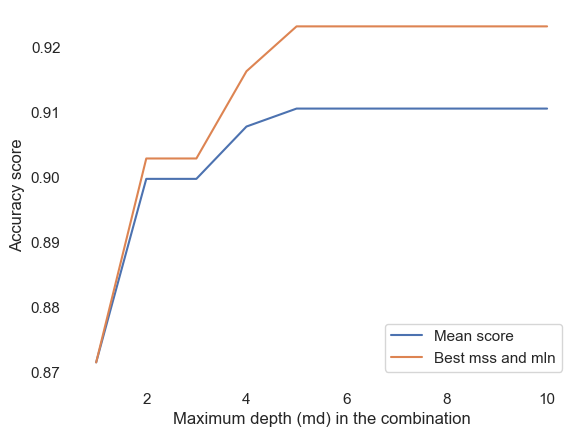

In [26]:
#We have saved the values from the nested for loops separately
#and found the best score is from the lowest combination md = 5, mss = 2, mln = 8

dct_range_lower = [0,100,200,300,400,500,600,700,800,900]
dct_range_some = ['1-*-*','2-*-*', '3-*-*', '4-*-*','5-*-*', '6-*-*', '7-*-*','8-*-*', '9-*-*', '10-*-*']

score_dct_mean = [0.871452262497039,0.8997358445865911,0.8997358445865911,0.9078026533996684,0.9105697701966361,
                   0.9105697701966361,0.9105697701966361,0.9105697701966361,0.9105697701966361,0.9105697701966361]
score_dct_max = [0.8714522624970387,0.9028784648187633,0.9028784648187633,0.9163231461738924,0.9232409381663113,
                 0.9232409381663113,0.9232409381663113,0.9232409381663113,0.9232409381663113,0.9232409381663113]

#plt.figure(figsize=(6,4))
plt.plot(range(1,11), score_dct_mean, label='Mean score')
plt.plot(range(1,11), score_dct_max, label = 'Best mss and mln')
plt.legend()
plt.xlabel('Maximum depth (md) in the combination')
plt.ylabel('Accuracy score')
plt.show()

In [27]:
#Final version of the DcT model
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the decision tree classifier with the predefined parameters
dct = DecisionTreeClassifier(max_depth=5, min_samples_split=2, max_leaf_nodes=8, criterion='gini')

# Train the model using the training set
dct.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=8)

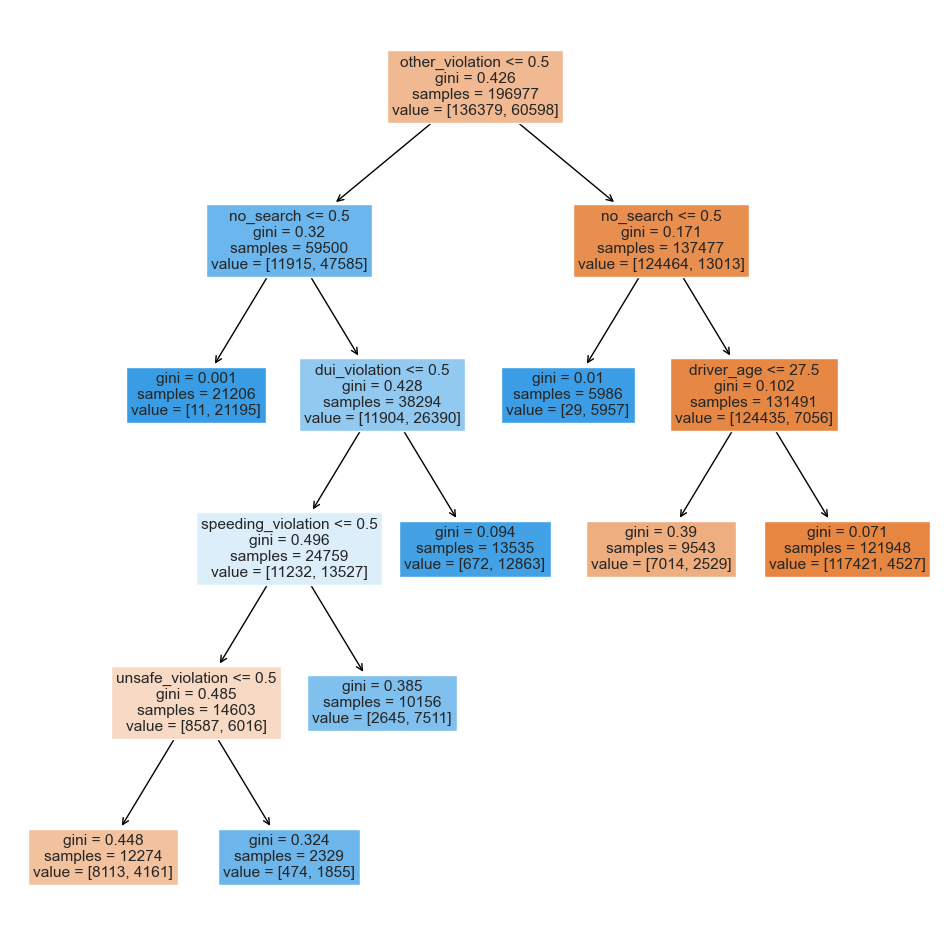

In [28]:
# Plot a graphical representation of the splits within the grown decision tree
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize=(12,12))
out = plot_tree(dct, filled=True, feature_names=X_train.columns)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

/Users/taeyoungkim/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 640x480 with 0 Axes>

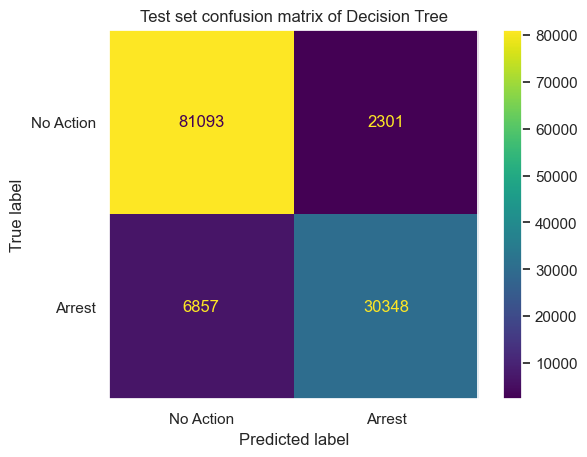

In [29]:
from sklearn.metrics import plot_confusion_matrix

# Plot the confusion matrix for the test set for the Decision Tree classifier
plt.figure()
plot_confusion_matrix(dct, X_test, y_test, display_labels=['No Action','Arrest'], values_format='d')
plt.grid(False)
plt.title('Test set confusion matrix of Decision Tree')
plt.show()

In [30]:
from sklearn.metrics import confusion_matrix

#For the Decision Tree
tn_dct, fp_dct, fn_dct, tp_dct = confusion_matrix(y_test, dct.predict(X_test)).ravel()
accuracy_dct = metrics.accuracy_score(y_test, dct.predict(X_test))

print('True Positive of DCT:\t', tp_dct)
print('True Negative of DCT:\t',tn_dct)
print('False Positive of DCT:\t', fp_dct)
print('False Negative of DCT:\t', fn_dct)
print('Accuracy of DCT:\t', round(accuracy_dct,2))

True Positive of DCT:	 30348
True Negative of DCT:	 81093
False Positive of DCT:	 2301
False Negative of DCT:	 6857
Accuracy of DCT:	 0.92


In [31]:
recall_dct_manual = tp_dct/(tp_dct + fn_dct)
precision_dct_manual = tp_dct/(tp_dct + fp_dct)

print('Recall of DCT:\t\t',round(recall_dct_manual,2))
print('Precision of DCT:\t',round(precision_dct_manual,2))

f1_dct_manual = 2 * precision_dct_manual * recall_dct_manual / (precision_dct_manual + recall_dct_manual)

print('F1 of DCT:\t\t',round(f1_dct_manual,2))

Recall of DCT:		 0.82
Precision of DCT:	 0.93
F1 of DCT:		 0.87


[0.03712238 0.265011   0.33900929 0.73956282 0.79647918 0.95035094
 0.99515536 0.99948128]


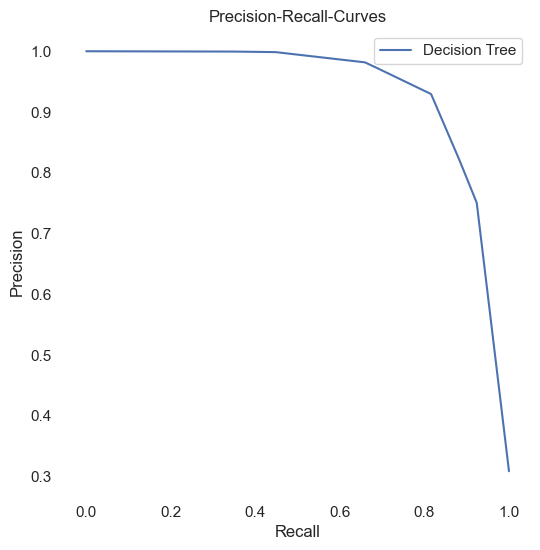

In [32]:
from sklearn.metrics import precision_recall_curve

precision_dct, recall_dct, thresholds = precision_recall_curve(y_test, dct.predict_proba(X_test)[:, 1])

print(thresholds)
#Plot the curve
plt.figure(figsize=[6,6])
plt.plot(recall_dct, precision_dct, label='Decision Tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall-Curves')
plt.legend(loc='upper right')
plt.show()

[1.99948128 0.99948128 0.99515536 0.95035094 0.79647918 0.73956282
 0.33900929 0.265011   0.03712238]


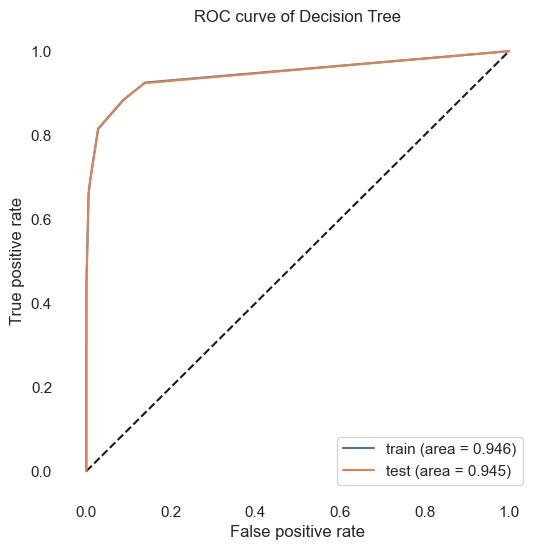

In [33]:
from sklearn.metrics import roc_curve, auc

#Calculate the false positive and true positive rates for training and test set
fpr_train_dct, tpr_train_dct, thresholds = roc_curve(y_train, dct.predict_proba(X_train)[:, 1])
fpr_test_dct, tpr_test_dct, thresholds = roc_curve(y_test, dct.predict_proba(X_test)[:, 1])

print(thresholds)
#Calculate the area under the curve
auc_train_dct = auc(fpr_train_dct, tpr_train_dct)
auc_test_dct = auc(fpr_test_dct, tpr_test_dct)

#Plot the ROC curve
plt.figure(figsize=[6,6])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_train_dct, tpr_train_dct, label='train (area = {:.3f})'.format(auc_train_dct))
plt.plot(fpr_test_dct, tpr_test_dct, label='test (area = {:.3f})'.format(auc_test_dct))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve of Decision Tree')
plt.legend(loc='lower right')
plt.show()

In [34]:
#PRC for kNN and DcT
plt.figure(figsize=[6,6])
plt.plot(recall_knn, precision_knn, label='kNN')
plt.plot(recall_dct, precision_dct, label='DcT')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall-Curves')
plt.legend(loc='upper right')
plt.show()

#ROC for kNN and DcT
plt.figure(figsize=[6,6])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_train_knn, tpr_train_knn, '--', label='train, kNN (area = {:.3f})'.format(auc_train_knn))
plt.plot(fpr_train_dct, tpr_train_dct, '--', label='train, DcT (area = {:.3f})'.format(auc_train_dct))
plt.plot(fpr_test_knn, tpr_test_knn, label='test, kNN (area = {:.3f})'.format(auc_test_knn))
plt.plot(fpr_test_dct, tpr_test_dct, label='test, DcT (area = {:.3f})'.format(auc_test_dct))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curves of Decision Tree')
plt.legend(loc='lower right')
plt.show()

NameError: name 'recall_knn' is not defined

<Figure size 600x600 with 0 Axes>

Task 3: Classification and Evaluation of Classifiers.

Which of the features in the dataset are suitable to form groups that can be checked for fairness. Use the results of one of your classifiers to calculate independence, separation and sufficiency for those groups. What do you notice?

In [35]:
print('\t\t KNN\t', 'DCT')
print('True Positive:\t', tp_knn,'\t', tp_dct)
print('True Negative:\t',tn_knn,'\t',tn_dct)
print('False Positive:\t', fp_knn,'\t', fp_dct)
print('False Negative:\t', fn_knn,'\t', fn_dct)
print('Recall:\t\t',round(recall_knn_manual,2),'\t',round(recall_dct_manual,2))
print('Precision:\t',round(precision_knn_manual,2),'\t',round(precision_dct_manual,2))
print('F1:\t\t',round(f1_knn_manual,2),'\t',round(f1_dct_manual,2))
print("Accuracy:\t", round(accuracy_knn, 2), "\t", round(accuracy_dct, 2))

		 KNN	 DCT
True Positive:	 30510 	 30348
True Negative:	 80664 	 81093
False Positive:	 2730 	 2301
False Negative:	 6695 	 6857


NameError: name 'recall_knn_manual' is not defined

kNN: Performance and Fairness

In [36]:
from sklearn.metrics import confusion_matrix

#Separating the dataset into groups
#i.e. subsets of race_White and race_Hispanic
group_a = X_test["race_White"] == 1
group_b = X_test["race_Hispanic"] == 1

cm_a = confusion_matrix(y_test[group_a], knn.predict(X_test)[group_a])
cm_b = confusion_matrix(y_test[group_b], knn.predict(X_test)[group_b])

tn_a, fp_a, fn_a, tp_a = cm_a.ravel()
tn_b, fp_b, fn_b, tp_b = cm_b.ravel()

KeyboardInterrupt: 

In [ ]:
%plt.figure(figsize=(10,5))
%plt.hist([y_test, y_test[group_a], y_test[group_b]], density=True, 
%           label=['Overall', 'White', 'Hispanic'])

%plt.xlabel('Stop Outcome')
%plt.title('Distribution of Outcomes of a Stop Among Races')
%plt.legend(loc='upper right')
%plt.show()

In [ ]:
#Conventional metrics
print("Metric\t\t\t race_White\t race_Hispanic")
print("False positive rate:\t", round(fp_a/(fp_a + tn_a),2), "\t\t", round(fp_b/(fp_b + tn_b),2))

precision_a = tp_a/(tp_a + fp_a)
precision_b = tp_b/(tp_b + fp_b)
recall_a = tp_a/(tp_a + fn_a)
recall_b = tp_b/(tp_b + fn_b)
f1_a = (2 * precision_a * recall_a) / (precision_a + recall_a)
f1_b = (2 * precision_b * recall_b) / (precision_b + recall_b)
accuracy_a = metrics.accuracy_score(y_test[group_a], knn.predict(X_test)[group_a])
accuracy_b = metrics.accuracy_score(y_test[group_b], knn.predict(X_test)[group_b])


print('Recall:\t\t\t',round(recall_a,2),'\t\t',round(recall_b,2))
print('Precision:\t\t',round(precision_a,2),'\t\t',round(precision_b,2))
print('F1:\t\t\t',round(f1_a,2),'\t\t',round(f1_b,2))
print('Accuracy:\t\t', round(accuracy_a,2), '\t\t', round(accuracy_b,2))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

#Confusion matrices for the kNN model

disp = ConfusionMatrixDisplay(cm_a, display_labels=['No Action','Arrest'])
disp.plot(values_format='d')
plt.grid(False)
plt.title("Confusion matrix for classifying White")

disp = ConfusionMatrixDisplay(cm_b, display_labels=['No Action','Arrest'])
disp.plot(values_format='d')
plt.grid(False)
plt.title("Confusion matrix for classifying Hispanic")
plt.show()

Fairness: Independence, Separation, Sufficiency

In [ ]:
#Probability of predicted class 1 (arrest) among Group A (White)

independence_a = (tp_a + fp_a) / (tn_a + fp_a + fn_a + tp_a)
independence_b = (tp_b + fp_b) / (tn_b + fp_b + fn_b + tp_b)

print('Independence race_White:\t',round(independence_a,2))
print('Independence race_Hispanic:\t',round(independence_b,2))

#As these values should be equal, their difference should be zero.
print('Difference:\t\t\t',round(independence_a-independence_b,2))

In [ ]:
separation1_a = tp_a / (tp_a + fp_a)
separation1_b = tp_b / (tp_b + fp_b)

print('1. Separation race_White:\t',round(separation1_a,2))
print('1. Separation race_Hispanic:\t',round(separation1_b,2))

#As these values should be equal, their difference should be zero.
print('Difference:\t\t\t',round(separation1_a-separation1_b,2))

In [ ]:
separation2_a = tn_a / (tn_a + fn_a)
separation2_b = tn_b / (tn_b + fn_b)

print('2. Separation race_White:\t',round(separation2_a,2))
print('2. Separation race_Hispanic:\t',round(separation2_b,2))

#As these values should be equal, their difference should be zero.
print('Difference:\t\t\t',round(separation2_a-separation2_b,2))

In [ ]:
sufficiency1_a = tp_a / (tp_a + fn_a)
sufficiency1_b = tp_b / (tp_b + fn_b)

print('1. Sufficiency race_White:\t',round(sufficiency1_a,2))
print('1. Sufficiency race_Hispanic:\t',round(sufficiency1_b,2))

#As these values should be equal, their difference should be zero.
print('Difference:\t\t\t',round(sufficiency1_a-sufficiency1_b,2))

In [ ]:
sufficiency2_a = fp_a / (fp_a + tn_a)
sufficiency2_b = fp_b / (fp_b + tn_b)

print('2. Sufficiency race_White:\t',round(sufficiency2_a,2))
print('2. Sufficiency race_Hispanic:\t',round(sufficiency2_b,2))

#As these values should be equal, their difference should be zero.
print('Difference:\t\t\t',round(sufficiency2_a-sufficiency2_b,2))

In [ ]:
print(f"% tp race_White:\t {round(tp_a/(tp_a+fp_a+fn_a+tn_a),2)}")
print(f"% tp race_Hispanic:\t {round(tp_b/(tp_b+fp_b+fn_b+tn_b),2)}")

Result

We notice that the difference in the independence metric - i.e. the percentage of true and false positives in each subset - for White and Hispanic is -0.37, meaning that there are less positives in the race_White subset than in the race_Hispanic subset. The difference is both due to the higher false positive rate for race_Hispanic (0.13 vs 0.02), as well as a larger number of true positives in the subset (54% in race_Hispanic as opposed to 21% in race_White). This means that the result is not statistically independent from the sensitive attribute, and the model and the dataset are biased.
DcT: performance and fairness (demonstration only)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

#Only for demonstration purposes:
#Confusion matrices for the DcT model

cm_dct_a = confusion_matrix(y_test[group_a], dct.predict(X_test)[group_a])
cm_dct_b = confusion_matrix(y_test[group_b], dct.predict(X_test)[group_b])

tn_dct_a, fp_dct_a, fn_dct_a, tp_dct_a = cm_dct_a.ravel()
tn_dct_b, fp_dct_b, fn_dct_b, tp_dct_b = cm_dct_b.ravel()

disp = ConfusionMatrixDisplay(cm_dct_a, display_labels=['Non-white','White'])
disp.plot(values_format='d')
plt.xticks(rotation=45)
plt.grid(False)
plt.title("Confusion matrix for classifying White")

disp = ConfusionMatrixDisplay(cm_dct_b, display_labels=['Non-hispanic','Hispanic'])
disp.plot(values_format='d')
plt.xticks(rotation=45)
plt.grid(False)
plt.title("Confusion matrix for classifying Hispanic")
plt.show()

In [ ]:
#INDEPENDENCE

independence_dct_a = (tp_dct_a + fp_dct_a) / (tn_dct_a + fp_dct_a + fn_dct_a + tp_dct_a)
independence_dct_b = (tp_dct_b + fp_dct_b) / (tn_dct_b + fp_dct_b + fn_dct_b + tp_dct_b)

print('DcT Independence')
print('Independence race_White:\t',round(independence_dct_a,2))
print('Independence race_Hispanic:\t',round(independence_dct_b,2))
print('Difference:\t\t\t',round(independence_dct_a-independence_dct_b,2))

#SEPARATION

separation1_dct_a = tp_dct_a / (tp_dct_a + fp_dct_b)
separation1_dct_b = tp_dct_b / (tp_dct_b + fp_dct_b)

print('DcT Separation 1.')
print('1. Separation race_White:\t',round(separation1_dct_a,2))
print('1. Separation race_Hispanic:\t',round(separation1_dct_b,2))
print('Difference:\t\t\t',round(separation1_dct_a-separation1_dct_b,2))

separation2_dct_a = tn_dct_a / (tn_dct_a + fn_dct_b)
separation2_dct_b = tn_dct_b / (tn_dct_b + fn_dct_b)

print('DcT Separation 2.')
print('2. Separation race_White:\t',round(separation2_dct_a,2))
print('2. Separation race_Hispanic:\t',round(separation2_dct_b,2))
print('Difference:\t\t\t',round(separation2_dct_a-separation2_dct_b,2))

#SUFFICIENCY

sufficiency1_dct_a = tp_dct_a / (tp_dct_a + fn_dct_a)
sufficiency1_dct_b = tp_dct_b / (tp_dct_b + fn_dct_b)

print('1. Sufficiency race_White:\t',round(sufficiency1_dct_a,2))
print('1. Sufficiency race_Hispanic:\t',round(sufficiency1_dct_b,2))
print('Difference:\t\t\t',round(sufficiency1_dct_a-sufficiency1_dct_b,2))

sufficiency2_dct_a = fp_dct_a / (fp_dct_a + tn_dct_a)
sufficiency2_dct_b = fp_dct_b / (fp_dct_b + tn_dct_b)

print('2. Sufficiency race_White:\t',round(sufficiency2_dct_a,2))
print('2. Sufficiency race_Hispanic:\t',round(sufficiency2_dct_b,2))
print('Difference:\t\t\t',round(sufficiency2_dct_a-sufficiency2_dct_b,2))

Task 4: Sensitive features

Exclude the features you used as sensitive characteristics from the training of the model. Check the new model for fairness. Is it fairer now? Why/why not?

Since gender and race can be used to discriminate against the drivers (i.e. they are sensitive features), but we focus on race only, we will remove the race_white and race_Hispanic features from the dataset. From above analysis, we know that there is marginal difference between the models, so we do not use DcT anymore.

In [ ]:
X_new=X[['driver_age','erratic_behavior','contraband_observed','contraband_found','driver_gender','speeding_violation',
         'dui_violation','other_violation','unsafe_violation', 'no_search', 'protective_frisk', 'incident', 'probable_cause']]

y_new = data_encoded['stop_outcome']
X_cv_new, X_test_new, y_cv_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=7)
X_train_new, X_valid_new, y_train_new, y_valid_new = train_test_split(X_cv_new, y_cv_new, test_size=0.3, stratify=y_cv, random_state=7)

scaler = StandardScaler()
# Replacing the values by the normalized ones
X_train_new.values[:] = scaler.fit_transform(X_train_new)
X_valid_new.values[:] = scaler.transform(X_valid_new)
X_test_new.values[:] = scaler.transform(X_test_new)

In [ ]:
#kNN_new: Without the Sensitive Features
#knn_new: sensitive feature are excluded
knn_new = KNeighborsClassifier(n_neighbors=30)
knn_new.fit(X_train_new, y_train_new)
tn_knn_new, fp_knn_new, fn_knn_new, tp_knn_new = confusion_matrix(y_test_new, knn_new.predict(X_test_new)).ravel()


In [ ]:
from sklearn import metrics

#True/false positives/negatives
print('True Positive of KNN_new:\t', tp_knn_new)
print('True Negative of KNN_new:\t',tn_knn_new)
print('False Positive of KNN_new:\t', fp_knn_new)
print('False Negative of KNN_new:\t', fn_knn_new)

#Standard metrics
recall_knn_manual_new = tp_knn_new/(tp_knn_new + fn_knn_new)
precision_knn_manual_new = tp_knn_new/(tp_knn_new + fp_knn_new)
print('Recall of KNN_new:\t\t',round(recall_knn_manual_new,2))
print('Precision of KNN_new:\t\t',round(precision_knn_manual_new,2))

f1_knn_manual_new = 2 * precision_knn_manual_new * recall_knn_manual_new / (precision_knn_manual_new + recall_knn_manual_new)
print('F1 of KNN_new:\t\t\t',round(f1_knn_manual_new,2))

accuracy_knn_new = metrics.accuracy_score(y_test_new, knn_new.predict(X_test_new))
print('Accuracy of KNN_new:\t\t', round(accuracy_knn_new, 2))

In [ ]:
#Comparisons of the models with and without measures of independence

print("Performance\t", "With Sensitive\t", "Without Sensitive","\n",
      "True Positive\t\t", tp_knn, "\t\t", tp_knn_new, "\n",
      "True Negative\t\t", tn_knn, "\t\t", tn_knn_new, "\n",
      "False Positive\t\t", fp_knn, "\t\t", fp_knn_new, "\n",
      "False Negative\t\t", fn_knn, "\t\t", fn_knn_new, "\n",
      "Recall\t\t\t", round(recall_knn_manual,2), "\t\t", round(recall_knn_manual_new,2), "\n",
      "Precision\t\t", round(precision_knn_manual, 2), "\t\t", round(precision_knn_manual_new, 2), "\n",
      "F1\t\t\t", round(f1_knn_manual,2), "\t\t", round(f1_knn_manual_new,2), "\n",
      "Accuracy\t\t", round(accuracy_knn, 2), "\t\t", round(accuracy_knn_new, 2), "\n")

In [ ]:
#Fairness: Ind., Sep. & Suff. Without Sensitive Attributes
#Generating a confusion matrix based on the new model
cm_a_new = confusion_matrix(y_test_new[group_a], knn_new.predict(X_test_new)[group_a])
cm_b_new = confusion_matrix(y_test_new[group_b], knn_new.predict(X_test_new)[group_b])

tn_a_new, fp_a_new, fn_a_new, tp_a_new = cm_a_new.ravel()
tn_b_new, fp_b_new, fn_b_new, tp_b_new = cm_b_new.ravel()

In [ ]:
#Generating metrics of fairness: independence, separation (1 and 2), and sufficiency (1 and 2)
independence_a_new = (tp_a_new + fp_a_new) / (tn_a_new + fp_a_new + fn_a_new + tp_a_new)
independence_b_new = (tp_b_new + fp_b_new) / (tn_b_new + fp_b_new + fn_b_new + tp_b_new)

separation1_a_new = tp_a_new / (tp_a_new + fp_a_new)
separation1_b_new = tp_b_new / (tp_b_new + fp_b_new)

separation2_a_new = tn_a_new / (tn_a_new + fn_a_new)
separation2_b_new = tn_b_new / (tn_b_new + fn_b_new)

sufficiency1_a_new = tp_a_new / (tp_a_new + fn_a_new)
sufficiency1_b_new = tp_b_new / (tp_b_new + fn_b_new)

sufficiency2_a_new = fp_a_new / (fp_a_new + tn_a_new)
sufficiency2_b_new = fp_b_new / (fp_b_new + tn_b_new)

print("Measure\t", "White\t", "Hispanic","\n",
"ind\t",round(independence_a_new, 2), "\t", round(independence_b_new,2), "\n",
"sep1\t", round(separation1_a_new,2), "\t",round(separation1_b_new,2), "\n",
"sep2\t", round(separation2_a_new,2), "\t",round(separation2_b_new,2), "\n",
"sep1\t", round(sufficiency1_a_new,2), "\t",round(sufficiency1_b_new,2), "\n",
"sep2\t", round(sufficiency2_a_new,2), "\t",round(sufficiency2_b_new,2), "\n")

print("Differences\t", "With Sensitive\t", "Without Sensitive","\n",
      "Independence\t\t", round(independence_a-independence_b,2), "\t\t", round(independence_a_new-independence_b_new,2), "\n",
      "Separation 1\t\t", round(separation1_a-separation1_b,2), "\t\t", round(separation1_a_new-separation1_b_new,2), "\n",
      "Separation 2\t\t", round(separation2_a-separation2_b,2), "\t\t", round(separation2_a_new-separation2_b_new,2), "\n",
      "Sufficiency 1\t\t", round(sufficiency1_a-sufficiency1_b,2), "\t\t", round(sufficiency1_a_new-sufficiency1_b_new,2), "\n",
      "Sufficiency 2\t\t", round(sufficiency2_a-sufficiency2_b,2), "\t\t", round(sufficiency2_a_new-sufficiency2_b_new,2), "\n"
      )